In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df_rainfall = pd.read_csv('../Data/Rainfall_Dataset.csv')

In [4]:
# Inspect the dataset
print(df_rainfall.head())
print(df_rainfall.tail())

# What is the shape of the data
print('The shape of the dataset is: ', df_rainfall.shape)

    StationName   County BeginGageServiceDate EndGageServiceDate  \
0  Ball Mountain  Tehama            9/26/1950           6/7/1951   
1  Ball Mountain  Tehama             6/7/1951          9/10/1952   
2  Ball Mountain  Tehama            9/10/1952          7/23/1953   
3  Ball Mountain  Tehama            7/23/1953          7/13/1954   
4  Ball Mountain  Tehama            7/13/1954          7/28/1955   

  TotalPrecipitation_inches  WaterYear Notes_FlaggedResults     x_coord  \
0                     39.51       1951                  NaN -122.780911   
1                     42.65       1952                  NaN -122.780911   
2                     44.09       1953                  NaN -122.780911   
3                     41.92       1954                  NaN -122.780911   
4                     28.42       1955                  NaN -122.780911   

     y_coord  
0  39.936369  
1  39.936369  
2  39.936369  
3  39.936369  
4  39.936369  
           StationName   County BeginGageServiceDa

In [5]:
# Summary statistics and missing values
summary = df_rainfall.describe(include='all')
print("Statistical summary of dataset: ", summary)
missing_values = df_rainfall.isnull().sum()
print(missing_values)

# Columns in dataset
print(df_rainfall.columns)

Statistical summary of dataset:            StationName   County BeginGageServiceDate EndGageServiceDate  \
count             2152    2152                 1868               1874   
unique              33       8                 1095               1084   
top     McCarthy Point  Plumas            9/30/2012          9/30/2012   
freq                79     603                   10                 10   
mean               NaN     NaN                  NaN                NaN   
std                NaN     NaN                  NaN                NaN   
min                NaN     NaN                  NaN                NaN   
25%                NaN     NaN                  NaN                NaN   
50%                NaN     NaN                  NaN                NaN   
75%                NaN     NaN                  NaN                NaN   
max                NaN     NaN                  NaN                NaN   

       TotalPrecipitation_inches    WaterYear  \
count                       2

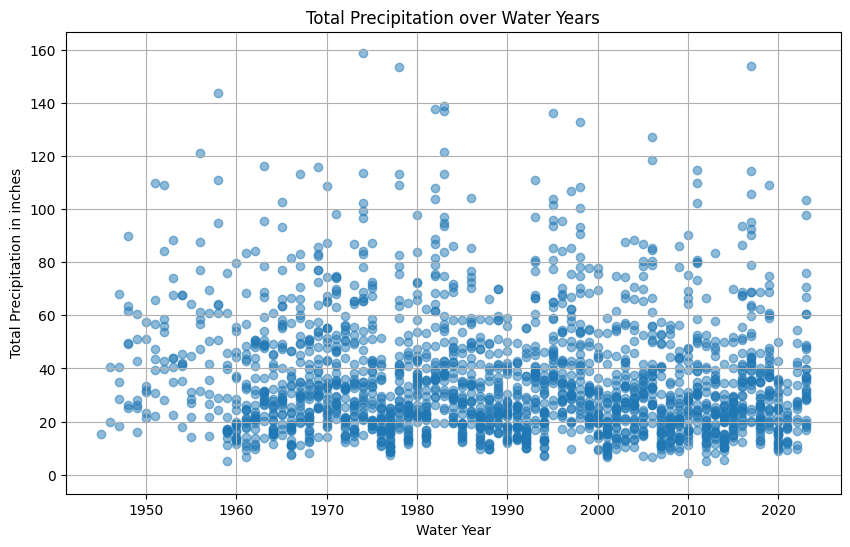

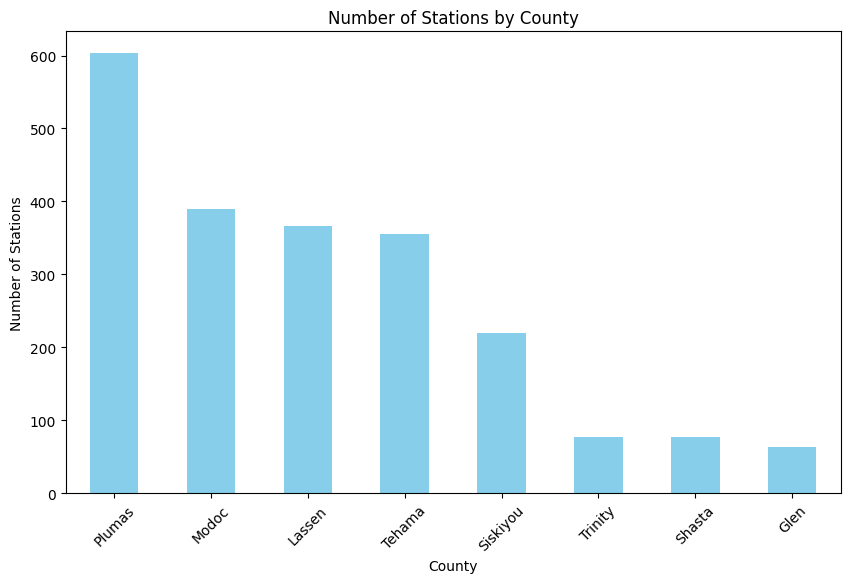

In [6]:
# Visualization

# Convert TotalPrecipitation_inches to numeric
df_rainfall['TotalPrecipitation_inches'] = pd.to_numeric(df_rainfall['TotalPrecipitation_inches'], errors='coerce')

# Plot of total precipitation over the years
plt.figure(figsize=(10, 6))
plt.scatter(df_rainfall['WaterYear'], df_rainfall['TotalPrecipitation_inches'], alpha=0.5)
plt.title('Total Precipitation over Water Years')
plt.xlabel('Water Year')
plt.ylabel('Total Precipitation in inches')
plt.grid(True)
plt.show()

# Bar plot for the distribution of stations across counties
plt.figure(figsize=(10, 6))
county_counts = df_rainfall['County'].value_counts()
county_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Stations by County')
plt.xlabel('County')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.show()

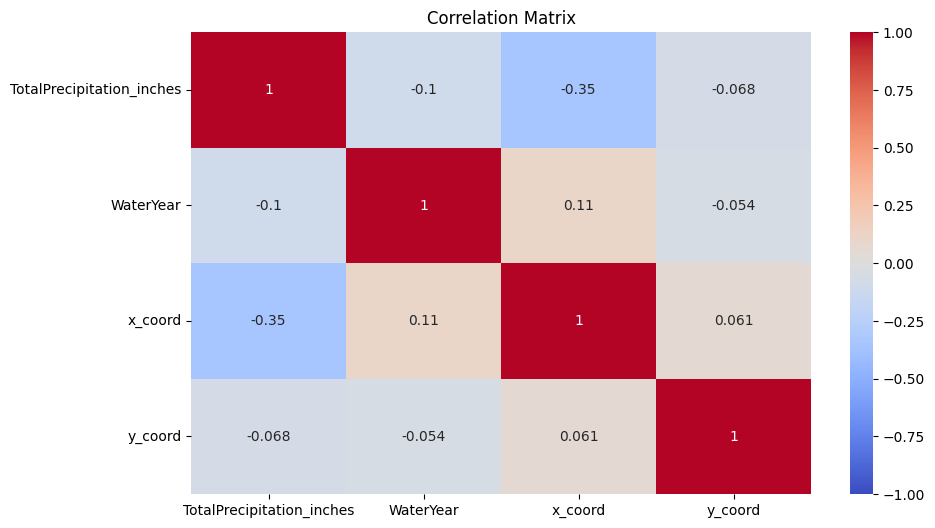

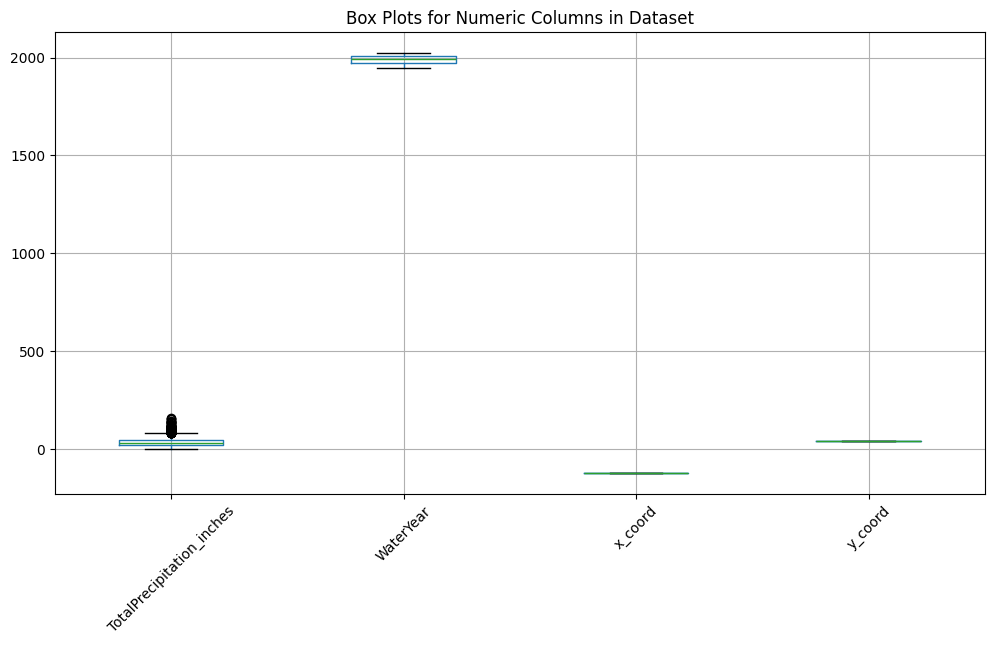

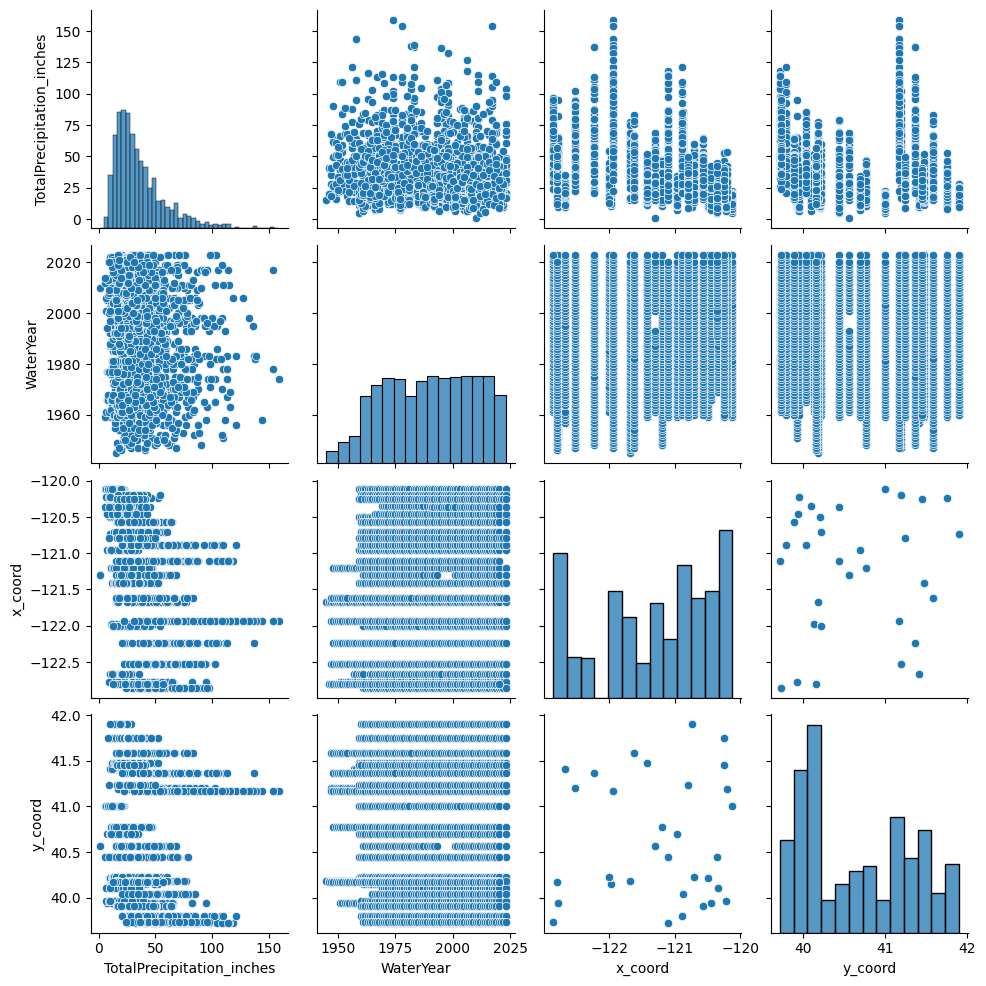

Index(['TotalPrecipitation_inches', 'WaterYear', 'x_coord', 'y_coord'], dtype='object')


In [7]:
# Correlation matrix to understand how features are correlated
# Drop all non-numeric columns for correlation matrix
numeric_data = df_rainfall.drop(columns=['StationName ', 'County', 'BeginGageServiceDate', 'EndGageServiceDate', 'Notes_FlaggedResults'])

# Correlation matrix
corr_matrix = numeric_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Plot box plots for numeric data to see outlier distribution
plt.figure(figsize=(12, 6))
numeric_data.boxplot()
plt.title('Box Plots for Numeric Columns in Dataset')
plt.xticks(rotation=45)
plt.show()

# Pairplot for exploring relationships between features
sns.pairplot(numeric_data.dropna())
plt.show()

print(numeric_data.columns)

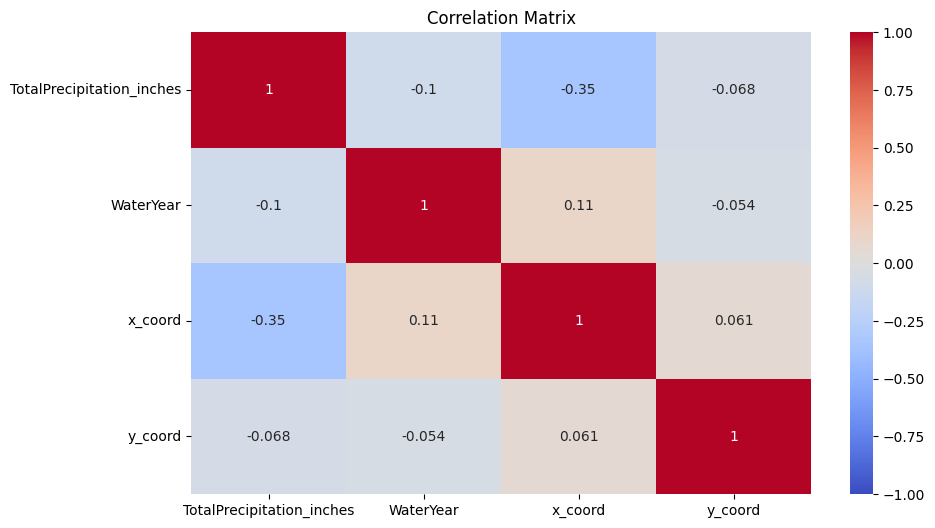

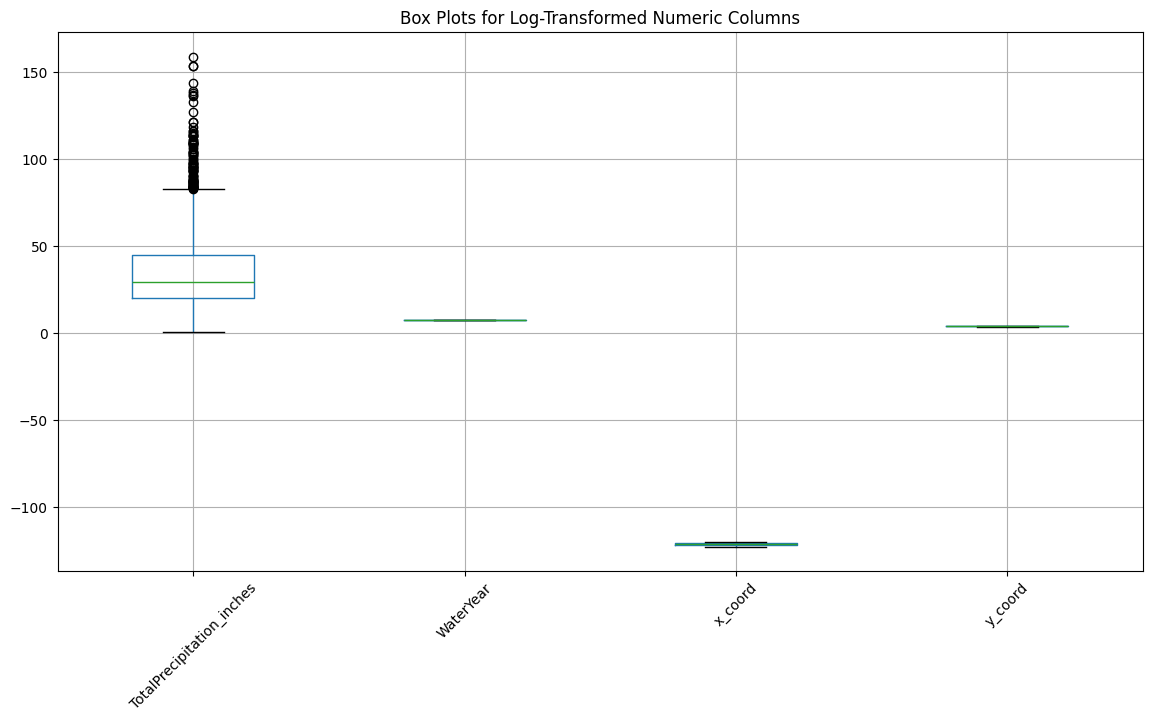

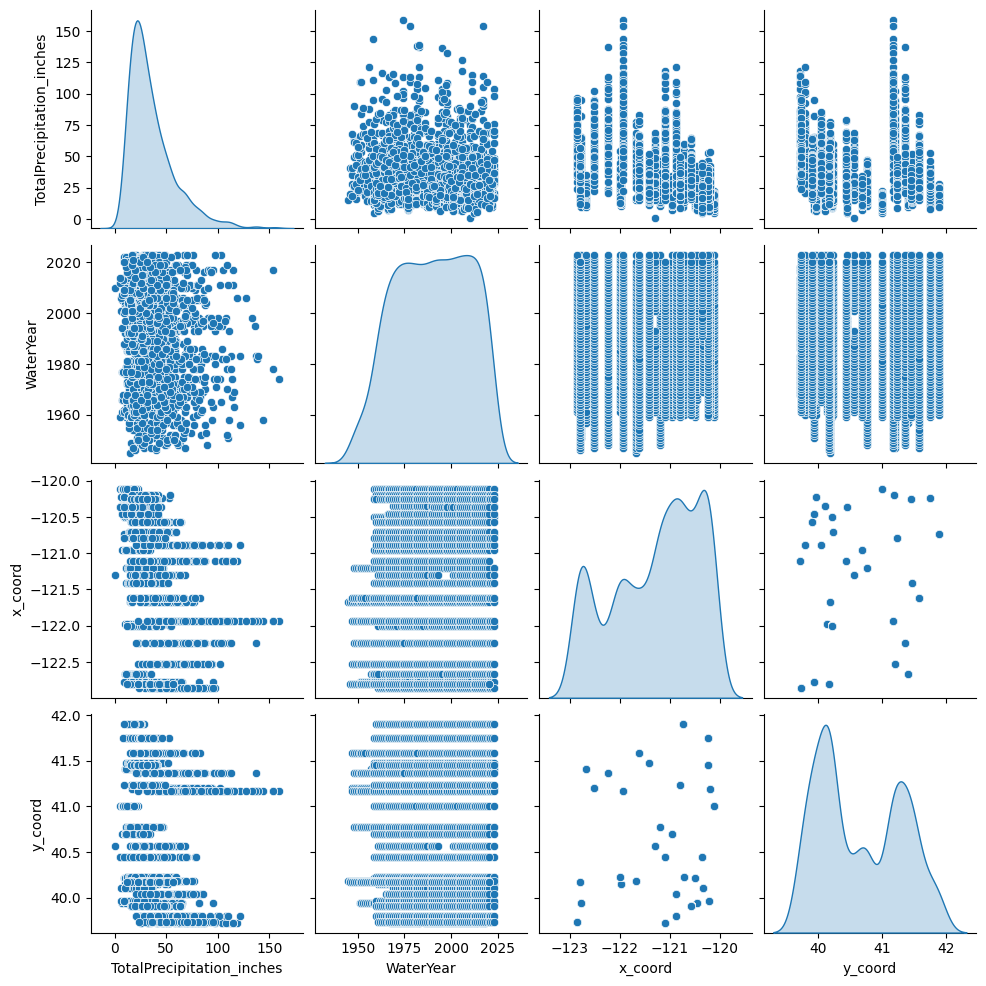

Numeric Data Columns: Index(['TotalPrecipitation_inches', 'WaterYear', 'x_coord', 'y_coord'], dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop non-numeric columns
numeric_data = df_rainfall.drop(columns=['StationName ', 'County', 'BeginGageServiceDate', 'EndGageServiceDate', 'Notes_FlaggedResults'])

# Clean column names (strip spaces)
numeric_data.columns = numeric_data.columns.str.strip()

# Correlation Matrix
corr_matrix = numeric_data.corr()

# Plot Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Apply Log Transformation for Skewed Data 
numeric_data_log = numeric_data.copy()
for col in numeric_data.columns:
    if (numeric_data[col] > 0).all():  # Log transform if all values are positive
        numeric_data_log[col] = np.log1p(numeric_data[col])  # log1p to handle small values

# Box Plots for Outlier Detection
plt.figure(figsize=(14, 7))
numeric_data_log.boxplot()
plt.title('Box Plots for Log-Transformed Numeric Columns')
plt.xticks(rotation=45)
plt.show()

# Pairplot for Exploring Relationships
sns.pairplot(numeric_data.dropna(), diag_kind='kde')  # KDE for diagonal
plt.show()


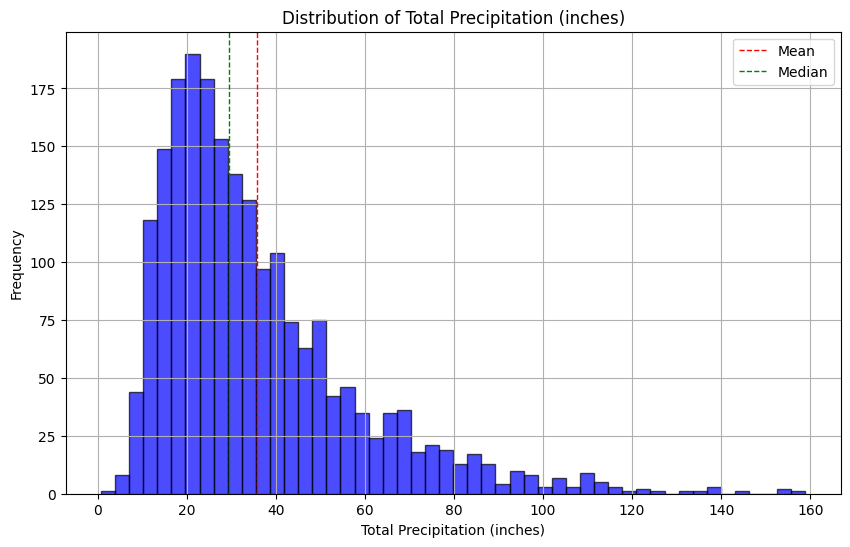

In [9]:
# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(df_rainfall["TotalPrecipitation_inches"], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(df_rainfall["TotalPrecipitation_inches"].mean(), color='red', linestyle='dashed', linewidth=1, label="Mean")
plt.axvline(df_rainfall["TotalPrecipitation_inches"].median(), color='green', linestyle='dashed', linewidth=1, label="Median")
plt.title("Distribution of Total Precipitation (inches)")
plt.xlabel("Total Precipitation (inches)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
final_data = df_rainfall.drop(columns=['BeginGageServiceDate', 'EndGageServiceDate', 'Notes_FlaggedResults'])
missing_values_fd = final_data.isnull().sum()
print(missing_values_fd)

StationName                   0
County                        0
TotalPrecipitation_inches    69
WaterYear                     0
x_coord                       0
y_coord                       0
dtype: int64


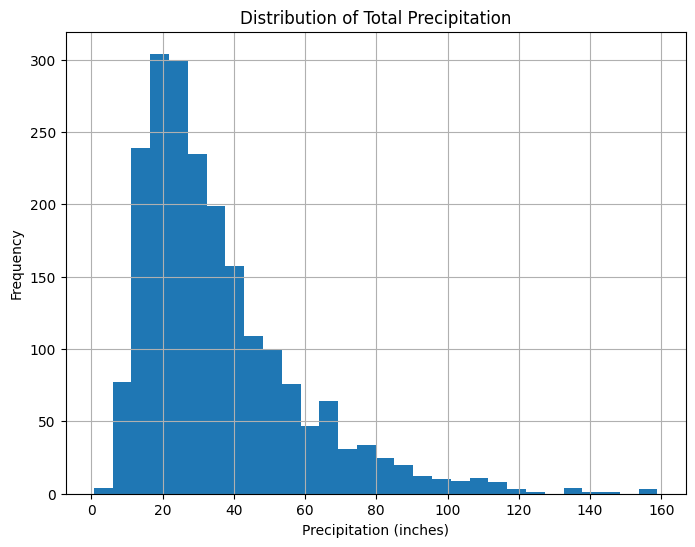

In [11]:
final_data['TotalPrecipitation_inches'].dropna().hist(bins=30, figsize=(8, 6))
plt.title('Distribution of Total Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()


In [12]:
final_data['TotalPrecipitation_inches'] = final_data['TotalPrecipitation_inches'].interpolate(method='linear')
final_data_n = final_data
missing_values_fdn = final_data_n.isnull().sum()
print(missing_values_fdn)

StationName                  0
County                       0
TotalPrecipitation_inches    0
WaterYear                    0
x_coord                      0
y_coord                      0
dtype: int64


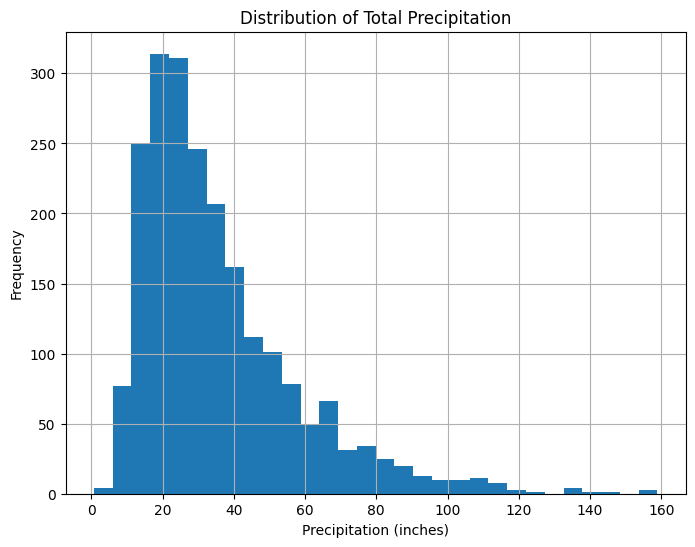

In [13]:
final_data['TotalPrecipitation_inches'].dropna().hist(bins=30, figsize=(8, 6))
plt.title('Distribution of Total Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()

In [14]:
final_data['TotalPrecipitation_inches'] = final_data['TotalPrecipitation_inches'].interpolate(method='linear')
final_data_n = final_data
missing_values_fdn = final_data_n.isnull().sum()
print(missing_values_fdn)

StationName                  0
County                       0
TotalPrecipitation_inches    0
WaterYear                    0
x_coord                      0
y_coord                      0
dtype: int64


In [15]:
# Save the final data to a csv file to use for the model development
final_data.to_csv("../Data/final_data_temp.csv", index=False)